In [1]:
# import libraries
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# make the output consistent in each run
np.random.seed(42)

# figure
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize= 14)
mpl.rc("ytick", labelsize= 12)
mpl.rc("xtick", labelsize= 12)

# directory to save figures
PROJECT_ROOT_DIRECTORY = r"C:\\Users\\nathan-mekuria\\Desktop\\MachineLearning\\Codes\\Book_Hands_on_ml\\SupportVectorMachine"
CHAPTER_ID = "svm"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIRECTORY, "image", CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok= True)

def save_fig(fig_id, tight_layout= True, fig_extension= "png", resolution= 300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format= fig_extension, dpi= resolution)


In [14]:
# Iris dataset: Iris Setosa and Iris Versicolor (linearly separable)
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [21]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

linear_clf = LinearSVC(loss= "hinge", C= C, random_state= 42)
svc_clf = SVC(kernel= "linear", C= C, random_state= 42)
sgd_clf = SGDClassifier(loss= "hinge", alpha= alpha, eta0= 0.001, learning_rate= "constant", max_iter= 1000, tol= 1e-3, random_state= 42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linear_clf.fit(X_scaled, y)
svc_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                 ", linear_clf.intercept_, linear_clf.coef_)
print("SVC:                       ", svc_clf.intercept_, svc_clf.coef_)
print("SGDClassifier(alpha{:.5f})".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)


LinearSVC:                  [0.28475098] [[1.05364854 1.09903804]]
SVC:                        [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha0.00200) [0.117] [[0.77714169 0.72981762]]


(np.float64(0.0), np.float64(5.5), np.float64(0.0), np.float64(2.0))

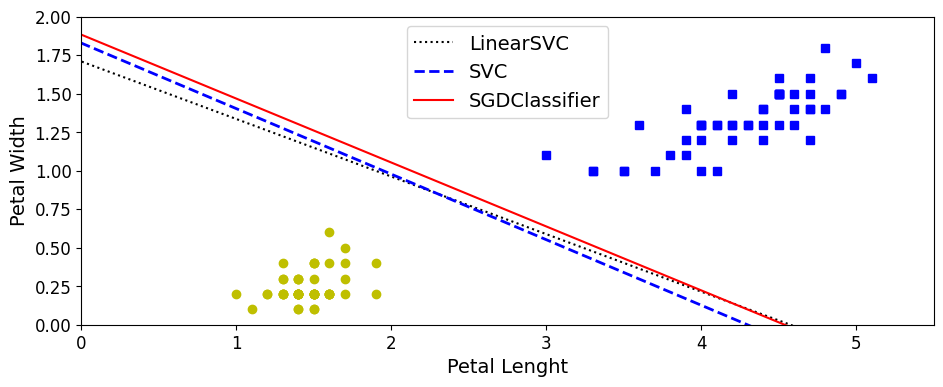

In [22]:
# computing slope and bias terms for each decision boundary
w1 = - linear_clf.coef_[0, 0] / linear_clf.coef_[0, 1] # can be [0, 1] instead ?
b1 = - linear_clf.intercept_[0] / linear_clf.coef_[0, 1]
w2 = - svc_clf.coef_[0, 0] / svc_clf.coef_[0, 1]
b2 = - svc_clf.intercept_[0] / svc_clf.coef_[0, 1]
w3 = - sgd_clf.coef_[0, 0] / sgd_clf.coef_[0, 1]
b3 = - sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

# transform the decision boundaries back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# plot all three decision boundaries
plt.figure(figsize= (11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label= "LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth= 2, label= "SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label= "SGDClassifier")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs') # Iris Versicolor
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo') # Iris Setosa
plt.xlabel("Petal Lenght", fontsize= 14)
plt.ylabel("Petal Width", fontsize= 14)
plt.legend(loc= "upper center", fontsize= 14)
plt.axis([0, 5.5, 0, 2.0]) 